In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sqlite3
import pandas as pd
import numpy as np
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from statsmodels.graphics.tsaplots import plot_acf
from hvPred import HVmodel

In [4]:
con = sqlite3.connect('stock_data.db', check_same_thread=False)

In [5]:
finance = [
    "JPM",  # JPMorgan Chase
    "BAC",  # Bank of America
    "C",    # Citigroup
    "GS",   # Goldman Sachs
    "MS",   # Morgan Stanley
    "AXP",  # American Express
    "WFC",  # Wells Fargo
    "USB",  # U.S. Bancorp
    "PNC",  # PNC Financial Services
    "SCHW"  # Charles Schwab
]

tech = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "NVDA",  # Nvidia
    "GOOGL", # Alphabet (Google)
    "AMD",   # Advanced Micro Devices
    "INTC",  # Intel
    "TSLA",  # Tesla (tech-adjacent)
    "CRM",   # Salesforce
    "ORCL",  # Oracle
    "AVGO"   # Broadcom
]

crypto = [
    "BTC",  # Bitcoin
    "ETH",  # Ethereum
    "LTC",  # Litecoin
    "SOL",  # Solana
    "XRP",  # Ripple
    "ADA",  # Cardano
    "BNB",  # Binance Coin
    "DOGE", # Dogecoin
    "AVAX", # Avalanche
    "DOT"   # Polkadot
]

etf = [
    "SPY",   # S&P 500 ETF
    "QQQ",   # Nasdaq 100 ETF
    "IWM",   # Russell 2000 ETF
    "VXX",   # Volatility ETF
    "XLK",   # Technology Sector ETF
    "XLF",   # Financial Sector ETF
    "ARKK",  # ARK Innovation ETF
    "DIA",   # Dow Jones ETF
    "EEM",   # Emerging Markets ETF
    "TLT"    # 20+ Year Treasury Bond ETF
]


In [6]:
all_stocks = finance + tech + crypto + etf

In [7]:
# for st in all_stocks:
#     dt = stock_data(st)
#     dt.get_daily('full')
#     dt.insert_table(con, if_exists='replace')

    

In [8]:
stock_list=list(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)['name'])
stock_list.sort()
'ADA' in stock_list

False

In [9]:
len(stock_list)

34

In [10]:
res={}

In [11]:
for st in stock_list:
    dt = stock_data(st)
    df = dt.load_data(con)
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df.sort_index(inplace=True)
    df['returns'] = np.log(df['close'] / df['close'].shift(1))*100
    df.dropna(inplace=True)

    ct = clusteringTest(df['returns'])
    score = ct.clusteringScore()

    res[st]=[len(df),score]
    

In [18]:
df_clustering =pd.DataFrame.from_dict(res, orient='index', columns=["Observations", "Clustering Score"])

In [19]:
df_clustering.sort_values(by='Clustering Score',ascending=False, inplace=True)

In [22]:
df_clustering

,Observations,Clustering Score
SPY,6458,1.528
GS,6463,1.069
LTC,6463,0.862
IBM,6302,0.760
COIN,1062,0.706
JPM,6463,0.697
SCHW,6463,0.611
USB,6463,0.609
PNC,6463,0.581
MS,6463,0.493


In [23]:
for st in stock_list:
    dt = stock_data(st)
    df = dt.load_data(con)
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df.sort_index(inplace=True)
    df['returns'] = np.log(df['close'] / df['close'].shift(1))*100
    df.dropna(inplace=True)

    ct = clusteringTest(df['returns'])
    score = ct.clusteringScore()

    garch = GARCHWalkForward(df)
    pred, params, resids = garch.fit_garch()
    mae_garch, mse_garch, rmse_garch, qlike_garch = garch.evaluate_model(pred)

    hv = HVmodel(df)
    hv_pred = hv.HVpred()
    mae_hv, mse_hv, rmse_hv, qlike_hv = hv.evaluate_model(hv_pred)

    res[st] = [len(df), score, mae_hv, mae_garch, mse_hv, mse_garch, rmse_hv, rmse_garch, qlike_hv, qlike_garch]
    print(f"Done with {st}")

    
    

Done with AAPL


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with AMC
Done with AMD


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with AVGO


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with AXP
Done with BAC
Done with BTC
Done with C
Done with COIN


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with CRM
Done with ETH


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with GOOGL
Done with GS
Done with IBM
Done with INTC


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with JNJ
Done with JPM
Done with LTC
Done with MS
Done with MSFT


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with MSTR


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with NVDA
Done with ORCL
Done with PG
Done with PNC
Done with QQQ
Done with RIOT
Done with SCHW
Done with SOL
Done with SPY


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with TSLA
Done with USB


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with VTI
Done with WFC


In [24]:
df_res=pd.DataFrame.from_dict(res, orient='index', columns=['Observations','Clustering Score','MAE (HV)','MAE (GARCH)','MSE (HV)','MSE (GARCH)','RMSE (HV)','RMSE (GARCH)','QLIKE (HV)','QLIKE (GARCH)'])

In [25]:
df_res.sort_values(by='Clustering Score',ascending=False, inplace=True)

In [26]:
df_res

,Observations,Clustering Score,MAE (HV),MAE (GARCH),MSE (HV),MSE (GARCH),RMSE (HV),RMSE (GARCH),QLIKE (HV),QLIKE (GARCH)
SPY,6458,1.528,0.431719,0.417018,0.338760,0.285305,0.582031,0.534139,0.670078,0.623520
GS,6463,1.069,0.645549,0.662985,0.741271,0.680328,0.860971,0.824820,1.850416,1.828301
LTC,6463,0.862,0.480482,0.519897,0.411173,0.443839,0.641227,0.666213,1.639647,1.612294
IBM,6302,0.760,0.601872,0.598424,0.719260,0.566751,0.848092,0.752828,1.437416,1.397870
COIN,1062,0.706,2.236843,2.261725,7.281576,6.795894,2.698440,2.606893,3.996920,3.959935
JPM,6463,0.697,0.601149,0.643367,0.669795,0.681654,0.818410,0.825623,1.627885,1.608657
SCHW,6463,0.611,0.785880,0.842727,1.138021,1.088821,1.066781,1.043466,2.180044,2.160438
USB,6463,0.609,0.769365,0.778431,1.015652,0.955646,1.007796,0.977572,2.040883,2.016240
PNC,6463,0.581,0.675412,0.678642,0.737803,0.694186,0.858955,0.833178,1.938292,1.908653
MS,6463,0.493,0.684007,0.780179,0.777779,0.884416,0.881918,0.940434,1.919016,1.933726


In [28]:
delta_QLIKE = {}
for st in stock_list:
    delta_QLIKE[st] =[df_res.loc[st,'Clustering Score'], (df_res.loc[st, 'QLIKE (HV)'] - df_res.loc[st, 'QLIKE (GARCH)'])/ df_res.loc[st, 'QLIKE (HV)']]

In [29]:
df_res = pd.DataFrame.from_dict(delta_QLIKE, orient='index', columns=['Clustering Score','delta QLIKE'])

In [30]:
df_res.sort_values(by='Clustering Score', ascending=False, inplace=True)

In [31]:
df_res

,Clustering Score,delta QLIKE
SPY,1.528,0.069480
GS,1.069,0.011951
LTC,0.862,0.016683
IBM,0.760,0.027512
COIN,0.706,0.009253
JPM,0.697,0.011812
SCHW,0.611,0.008994
USB,0.609,0.012074
PNC,0.581,0.015292
MS,0.493,-0.007665


<Axes: title={'center': 'Clustering Score vs Delta QLIKE'}, xlabel='Clustering Score', ylabel='delta QLIKE'>

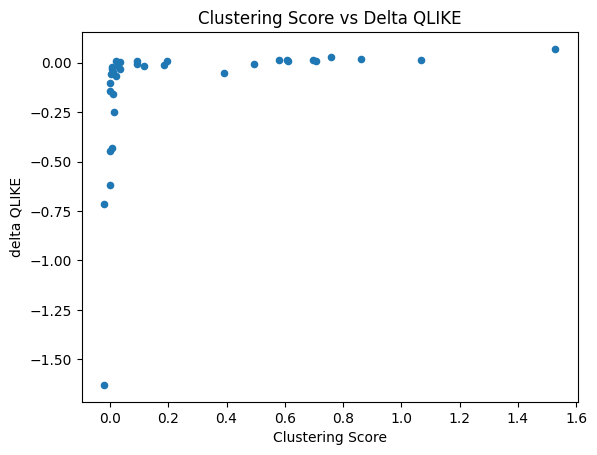

In [32]:
df_res.plot(kind='scatter', x='Clustering Score', y='delta QLIKE', title='Clustering Score vs Delta QLIKE')